# TP2 Zero-Shot

Imports

In [20]:
import torch
import os
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from PIL import Image
from torchvision import transforms
import requests
import matplotlib.pyplot as plt
from io import BytesIO
import numpy as np
import cv2

In [21]:
model_name = "CIDAS/clipseg-rd64-refined"
processor = CLIPSegProcessor.from_pretrained(model_name)
model = CLIPSegForImageSegmentation.from_pretrained(model_name)

In [22]:
def get_results(examples,ground_truth_list,plot_images = True) :
    
    iou_list = []
    for index in range(len(examples)):
        image_path = os.path.join(image_dir, examples[index]["path"])  # Construire le chemin absolu
        ground_truth_path = os.path.join(ground_truth_dir, ground_truth_list[index]["path"])  # Construire le chemin absolu
        # Vérifier si l'image existe
        if not os.path.exists(image_path):
            print(f"Image non trouvée : {image_path}")
            continue

        if not os.path.exists(ground_truth_path):
            print(f"groundtruth non trouvée : {ground_truth_path}")
            continue
        # Charger l'image et la convertir en RGB
        image = Image.open(image_path).convert("RGB")
        ground_truth = Image.open(ground_truth_path).convert("RGB")

        ground_truth = np.array(ground_truth)
        ground_truth_gray = cv2.cvtColor(ground_truth, cv2.COLOR_RGB2GRAY)

        _, ground_truth_binary = cv2.threshold(ground_truth_gray, 127, 180, cv2.THRESH_BINARY)



        # Prétraitement de l'image et du texte
       
        inputs = processor(text=examples[index]["prompt"], images=image, return_tensors="pt")

        # Inférence (mode évaluation)
        with torch.no_grad():
            outputs = model(**inputs)

        # Extraire le masque de segmentation
        pred_mask = outputs.logits.sigmoid().detach().cpu().numpy()[0]
        mask_binary = pred_mask > 0.45  # Seuil binaire
        # Redimensionner ground_truth pour qu'il ait la même taille que mask_binary
        ground_truth_resized = cv2.resize(ground_truth_binary, (mask_binary.shape[1], mask_binary.shape[0]))

        assert mask_binary.shape == ground_truth_resized.shape
        ground_truth_resized = (ground_truth_resized>127).astype(np.uint8)
        mask_binary = mask_binary.astype(np.uint8)

        # Calcul de l'IoU
        intersection = np.logical_and(mask_binary, ground_truth_resized).sum()
        union = np.logical_or(mask_binary, ground_truth_resized).sum()
        iou = intersection / union if union > 0 else 0
        if union>0 :
            iou_list.append(iou)
            # Afficher l'image
            if   iou<0.2 and plot_images :
                
                if iou<0.2 :
                    print("Mauvaise segmentation")
                    plt.figure(figsize=(12, 6))
                    plt.suptitle(f"Requête : {examples[index]['prompt']}")

                    plt.subplot(1, 3, 1)
                    plt.imshow(ground_truth_resized,cmap="gray")
                    plt.title("ground truth ")
                    plt.axis("off")

                    plt.subplot(1, 3, 2)
                    plt.imshow(mask_binary, cmap="gray")
                    plt.title("Masque de segmentation")
                    plt.axis("off")
                    plt.subplot(1, 3, 3)
                    plt.imshow(image)
                    plt.title("image")
                    plt.axis("off")
                    plt.show()
                else : 
                    print("Bonne segmentation : ",examples[index]['path'], 'IoU : ',iou)

                
    return iou_list

Mauvaise segmentation


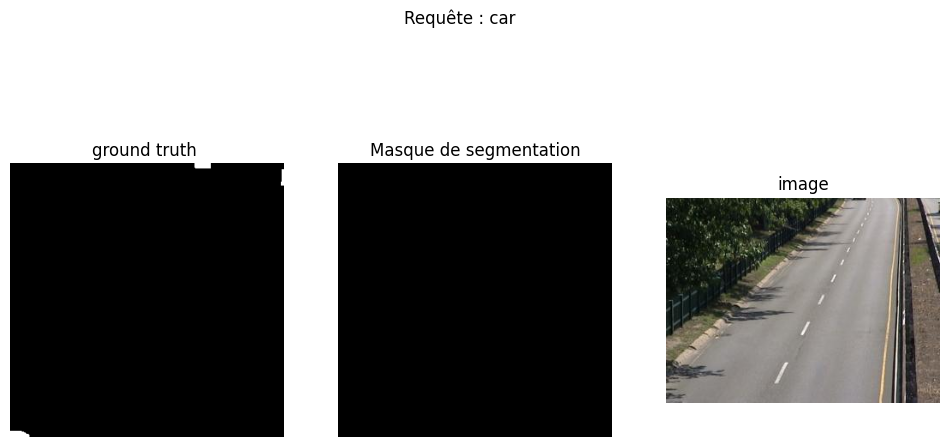

Mauvaise segmentation


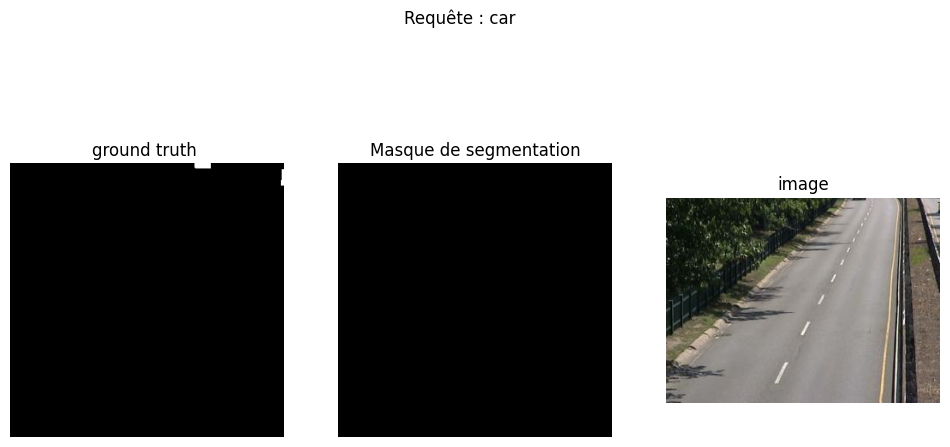

Mauvaise segmentation


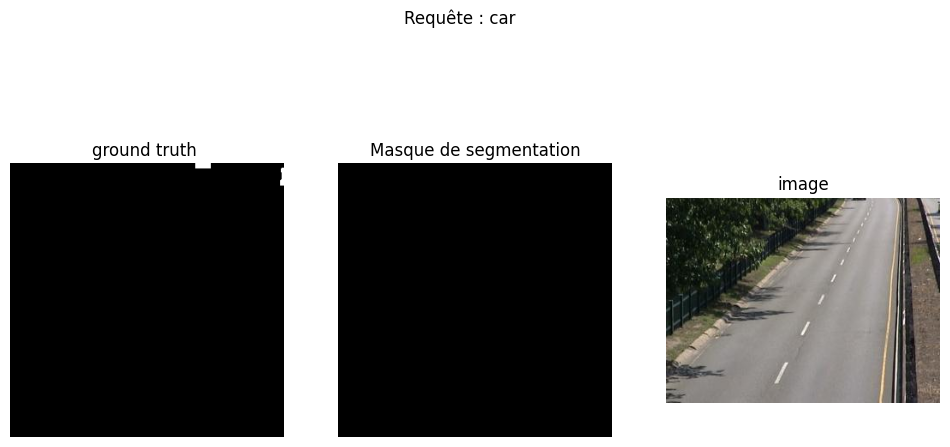

Mauvaise segmentation


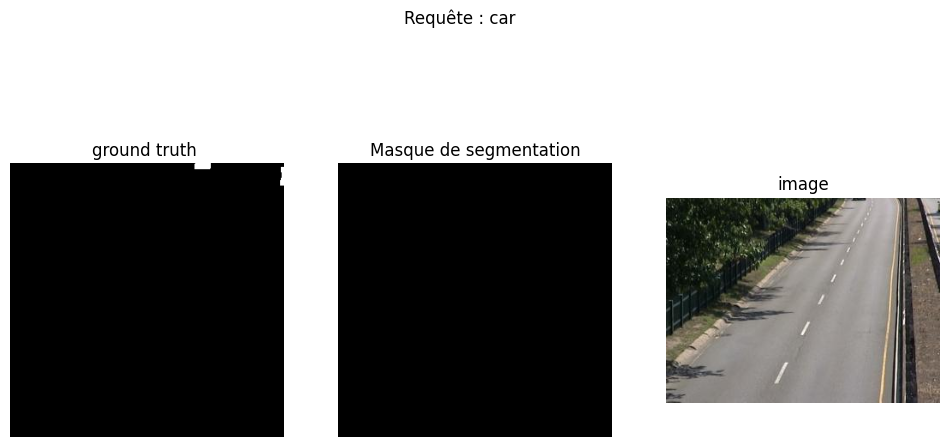

Mauvaise segmentation


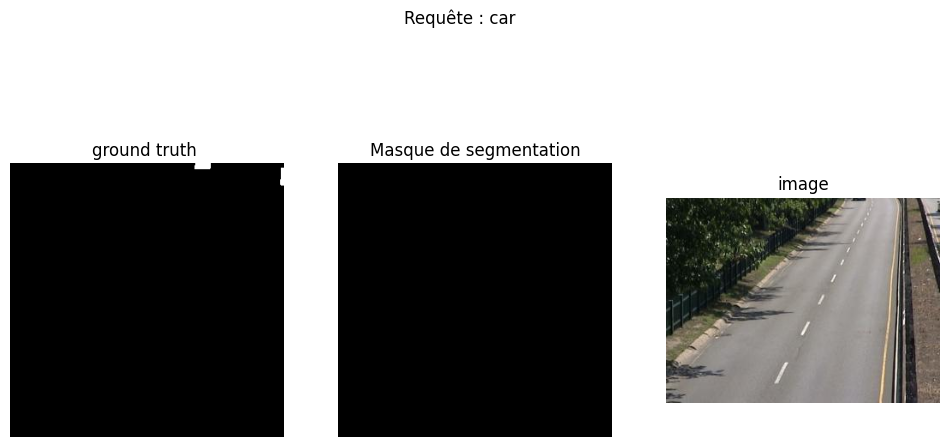

Mauvaise segmentation


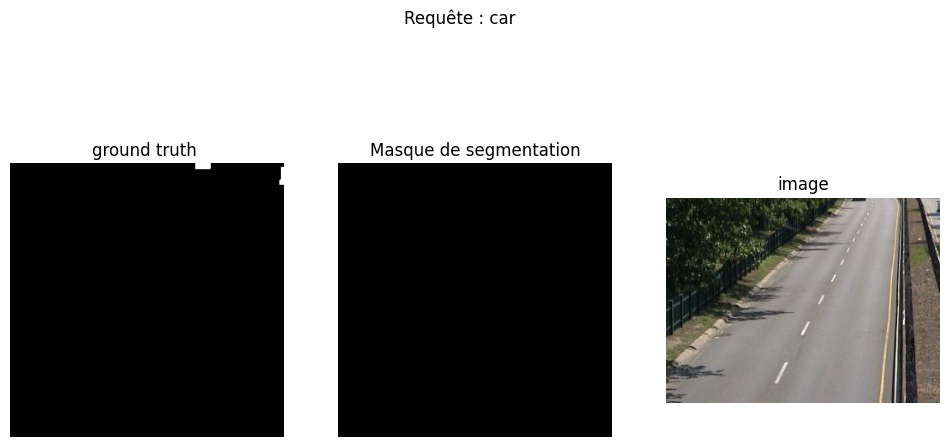

Mauvaise segmentation


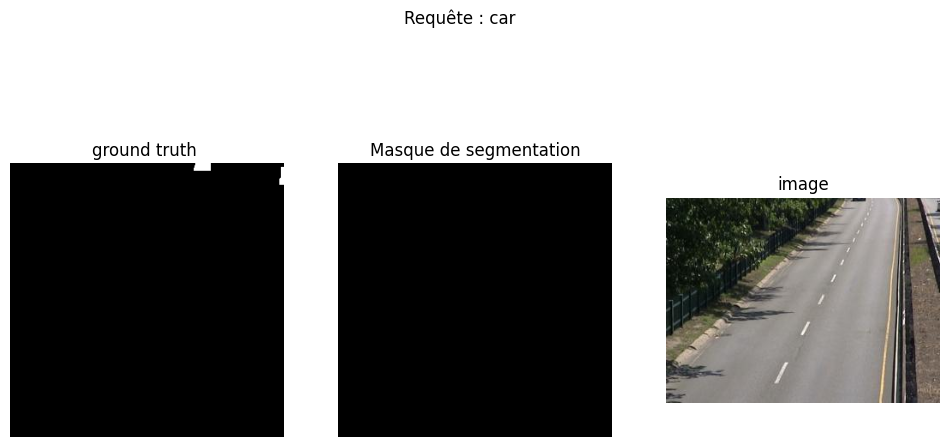

Mauvaise segmentation


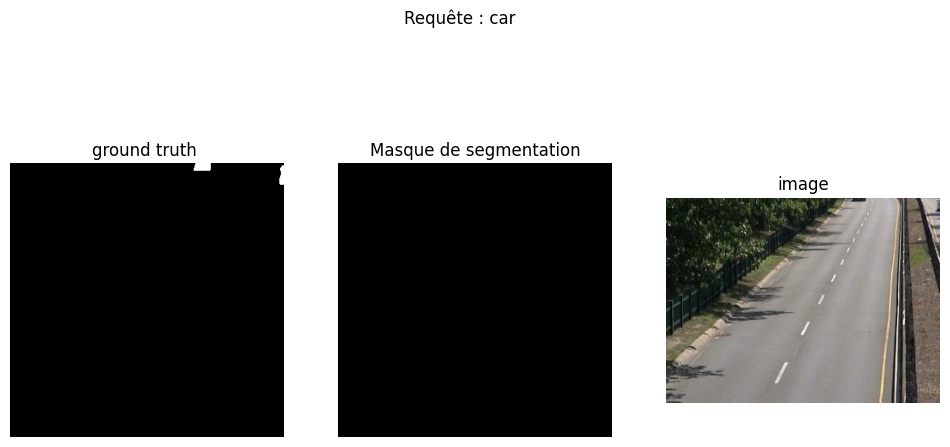

Mauvaise segmentation


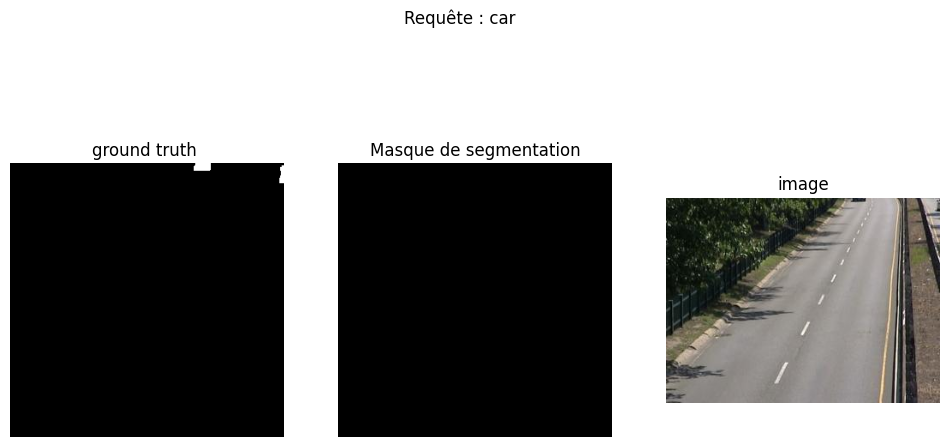

Mauvaise segmentation


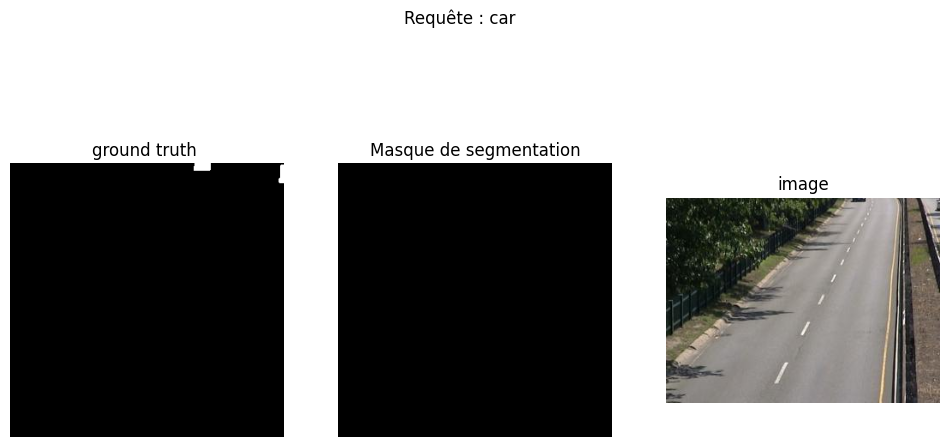

Mauvaise segmentation


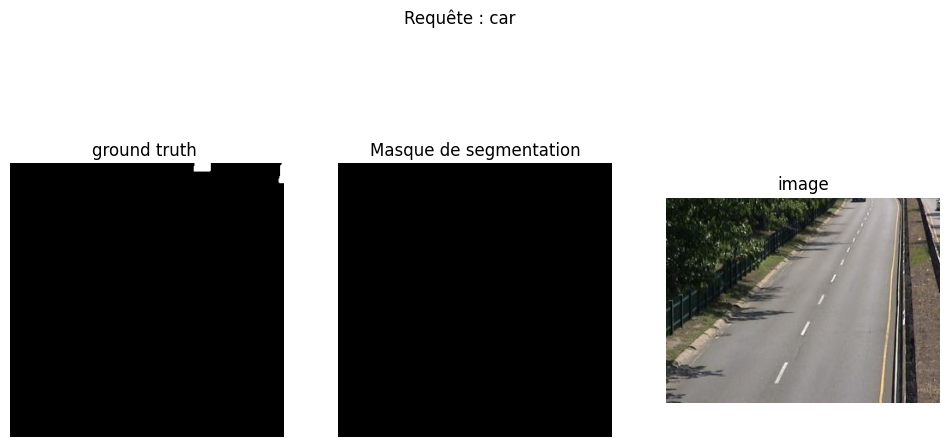

Mauvaise segmentation


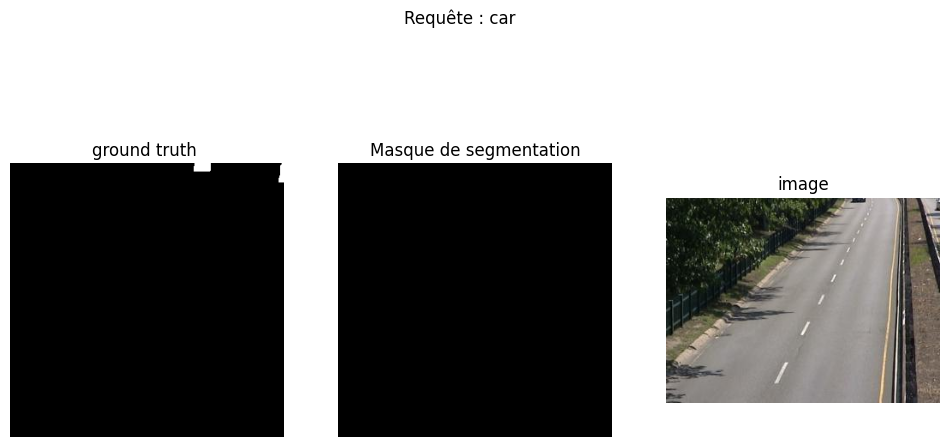

Mauvaise segmentation


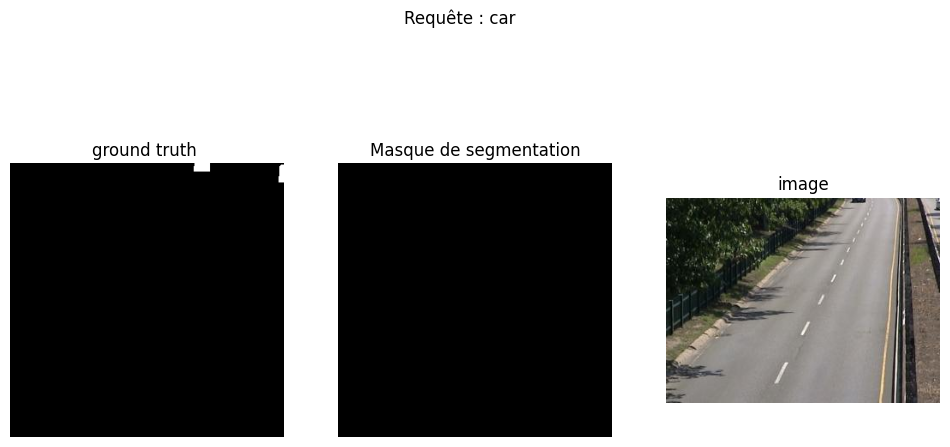

Mauvaise segmentation


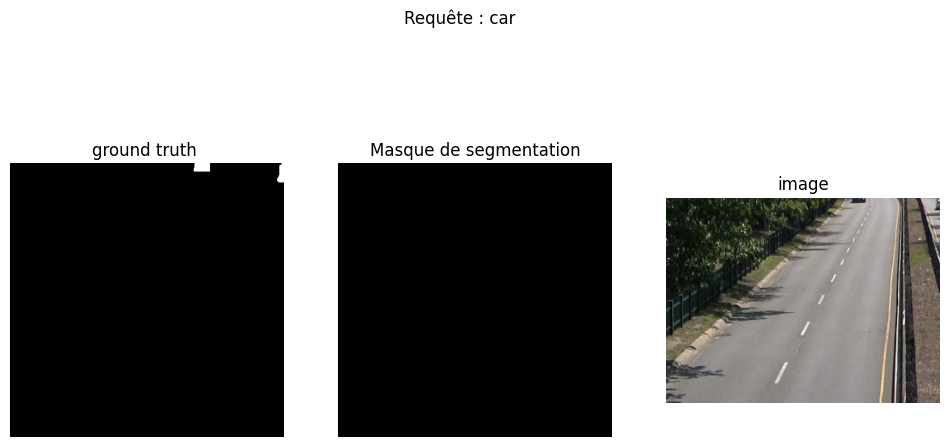

Mauvaise segmentation


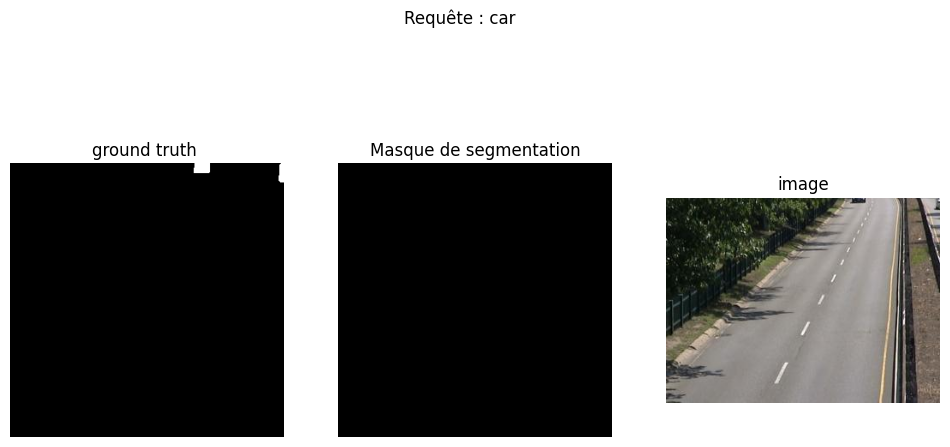

Mauvaise segmentation


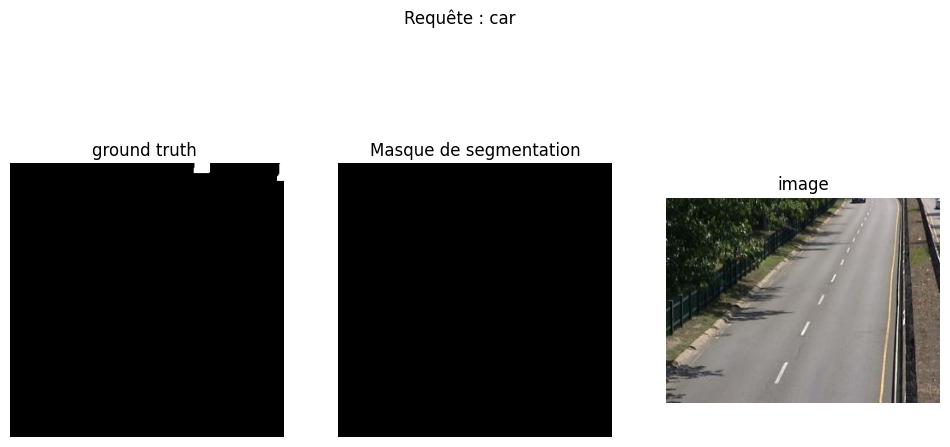

Mauvaise segmentation


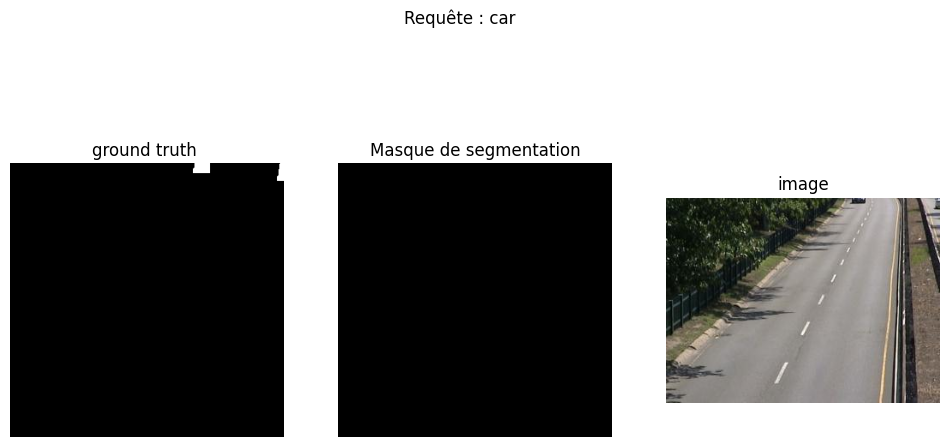

Mauvaise segmentation


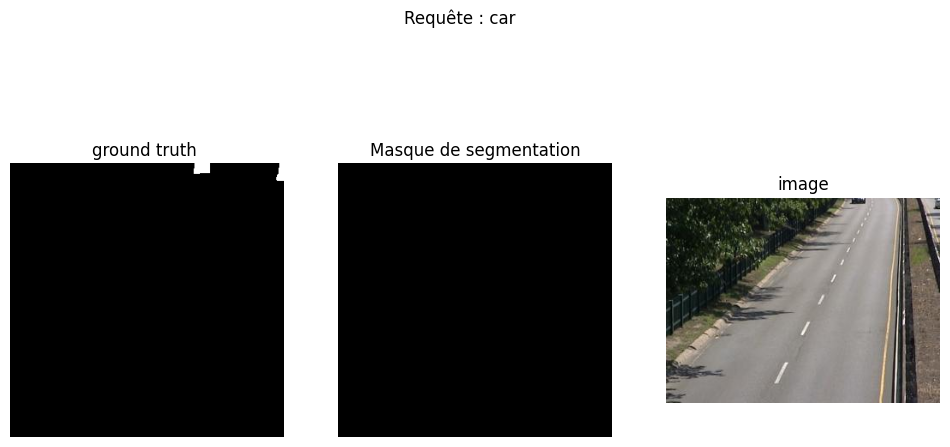

Mauvaise segmentation


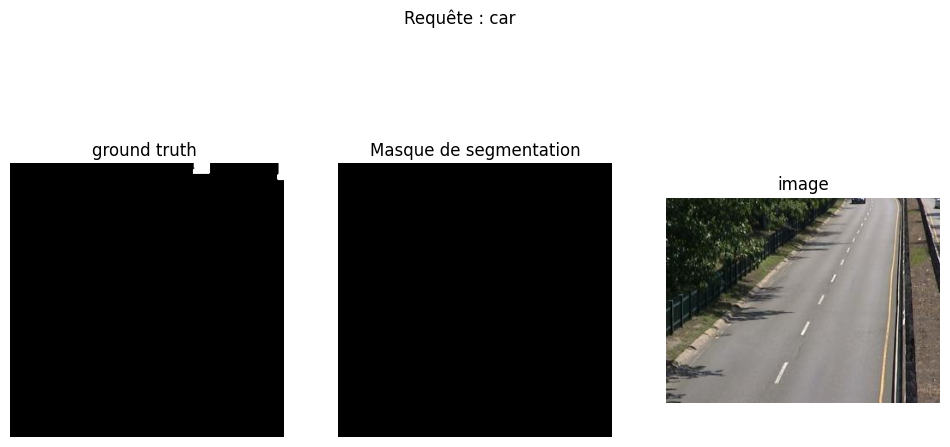

Mauvaise segmentation


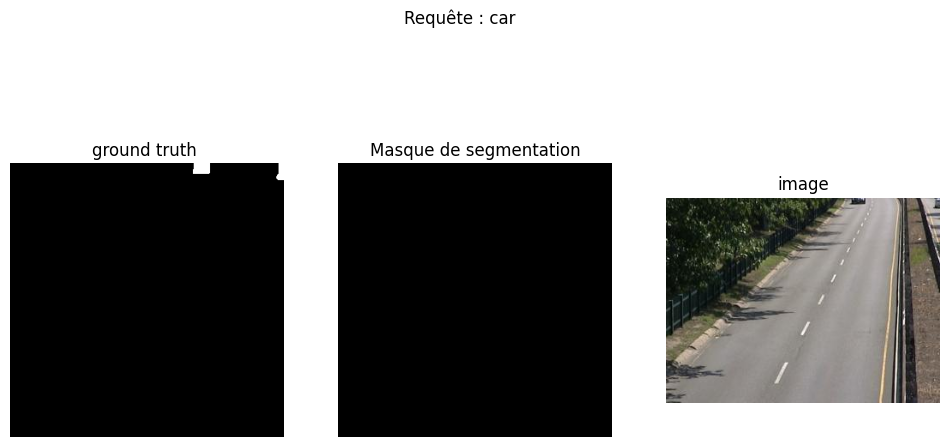

Mauvaise segmentation


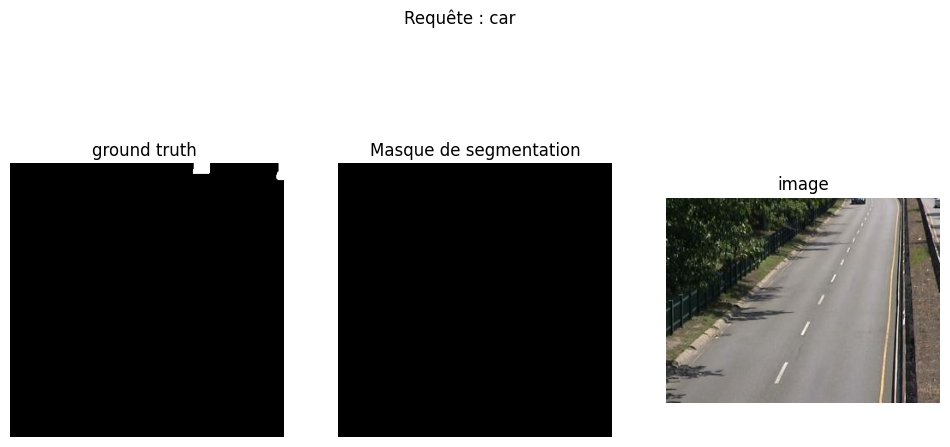

Mauvaise segmentation


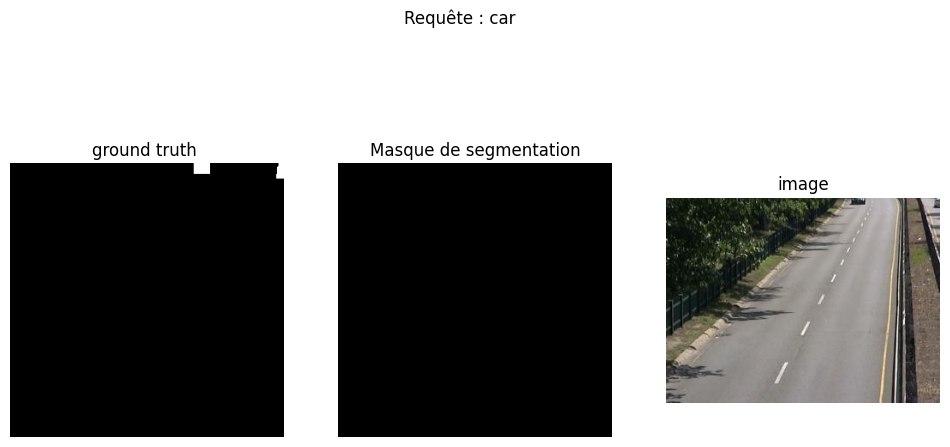

Mauvaise segmentation


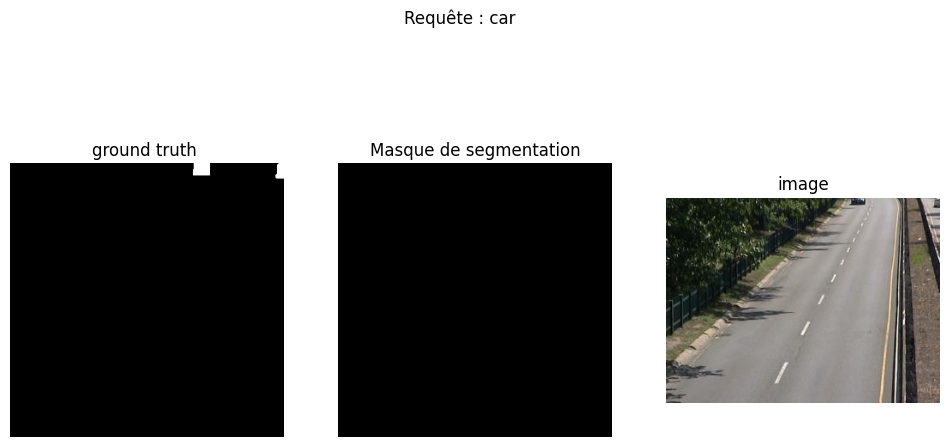

Mauvaise segmentation


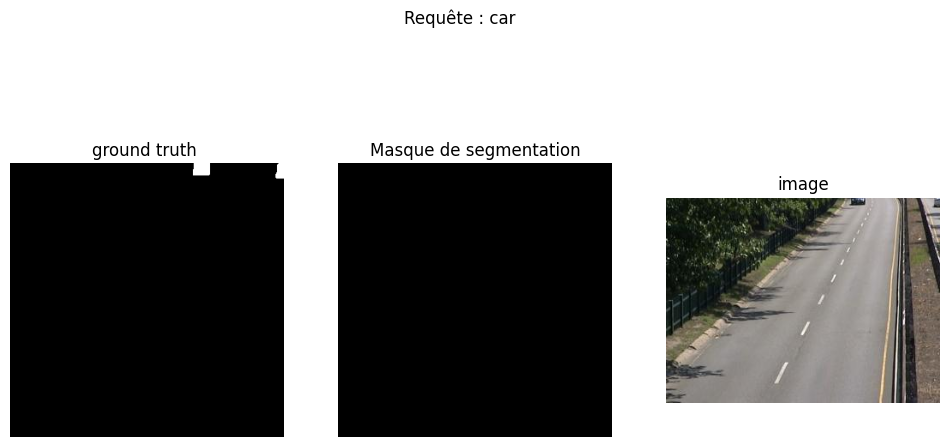

Mauvaise segmentation


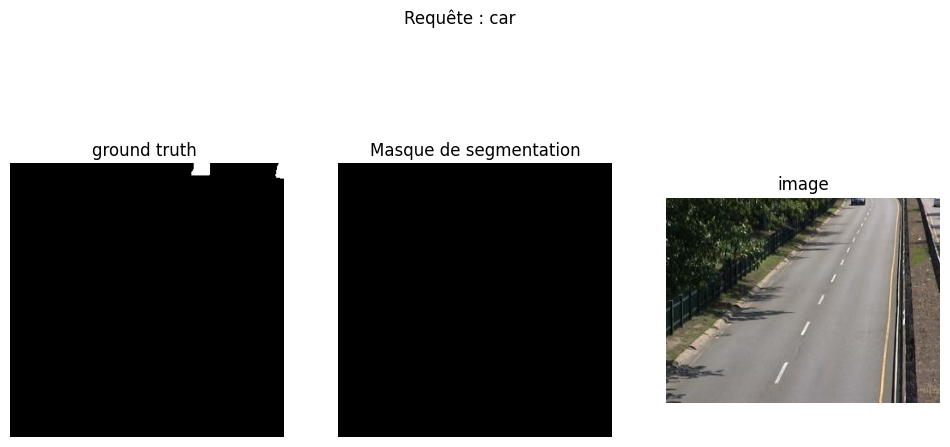

Mauvaise segmentation


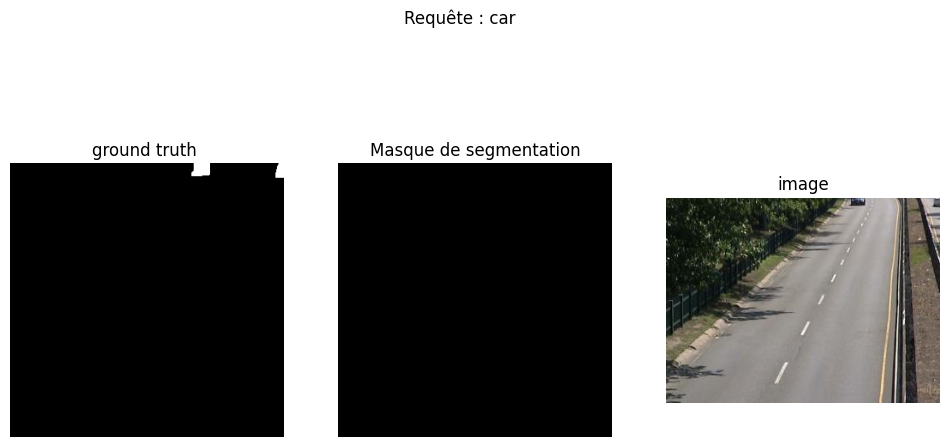

Mauvaise segmentation


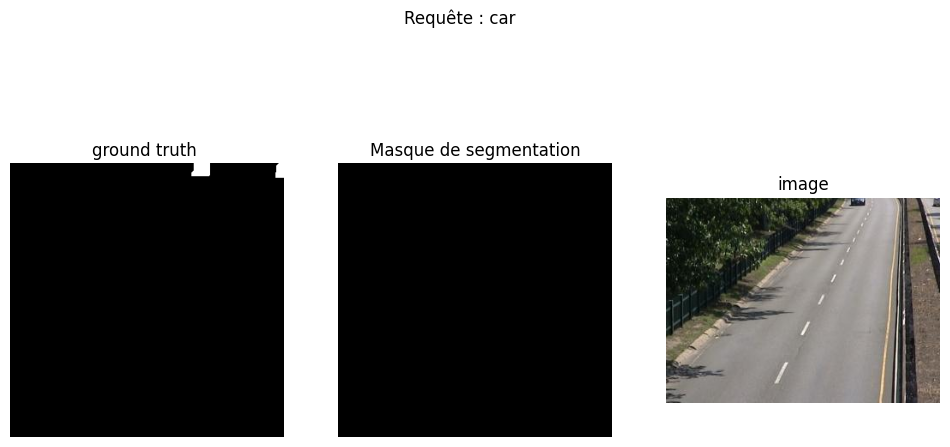

Mauvaise segmentation


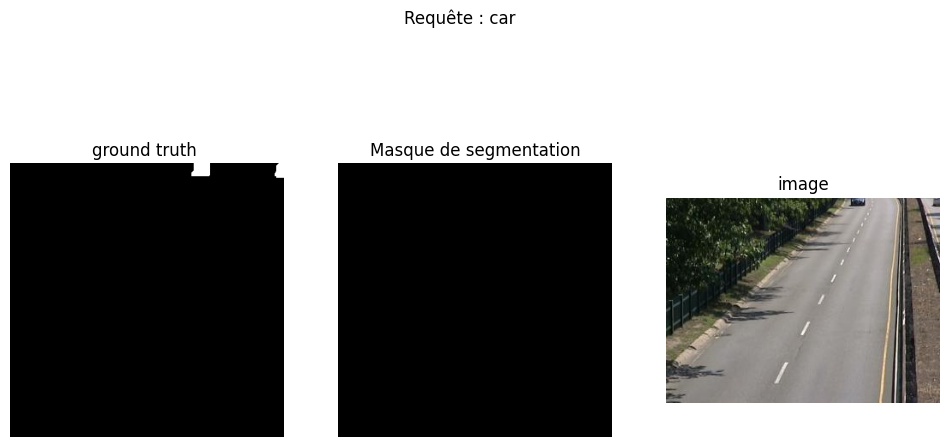

Mauvaise segmentation


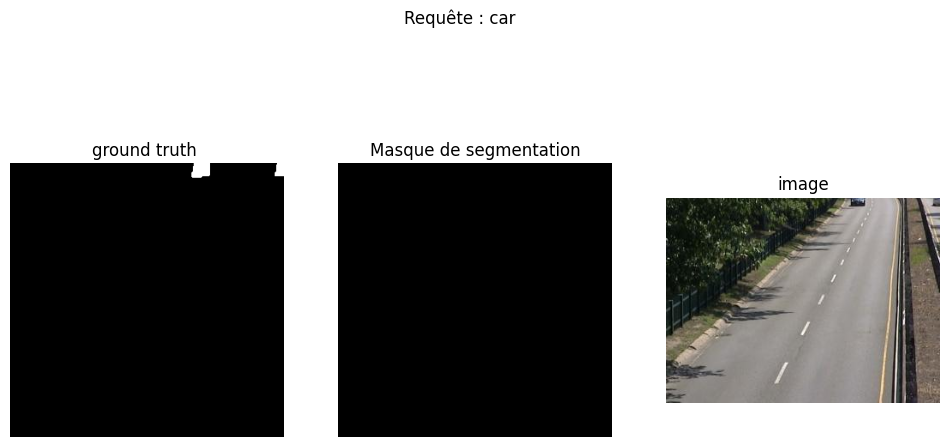

Mauvaise segmentation


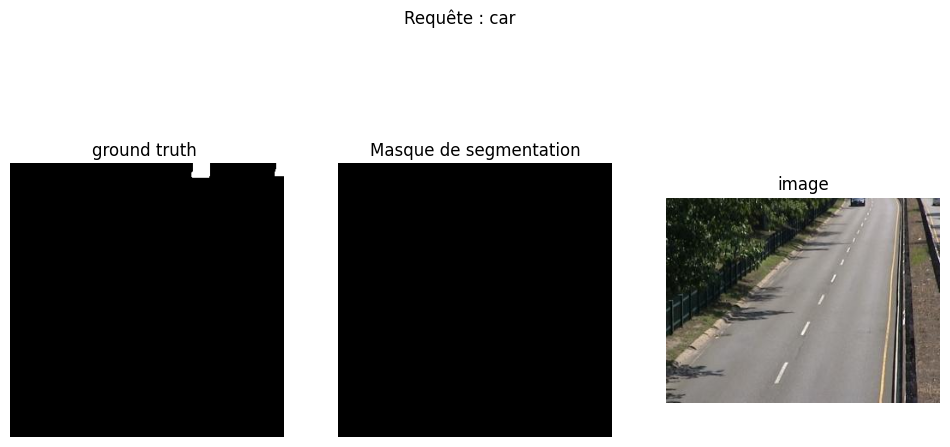

Mauvaise segmentation


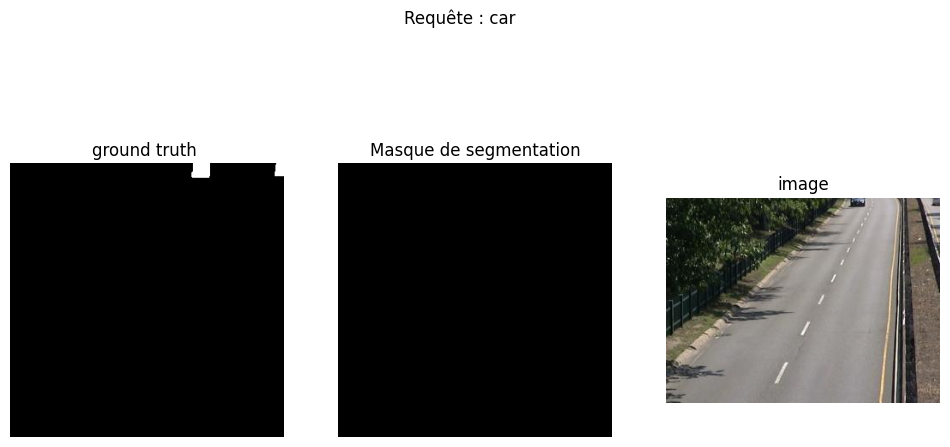

Mauvaise segmentation


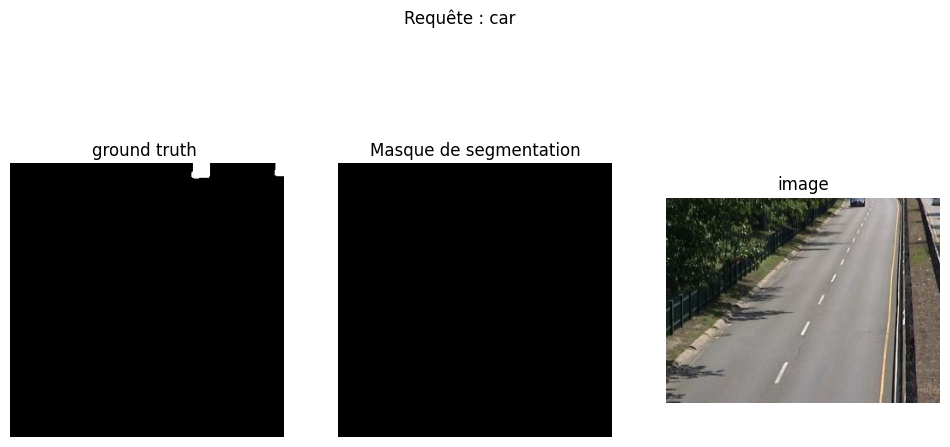

In [23]:

# Définis le dossier contenant les images
image_dir = "baseline/baseline/highway/input"  
ground_truth_dir = "baseline/baseline/highway/groundtruth"  
nombre_fichiers = len([f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))])
nombre_fichiers_groundtruth = len([f for f in os.listdir(ground_truth_dir) if os.path.isfile(os.path.join(ground_truth_dir, f))])
assert nombre_fichiers == nombre_fichiers_groundtruth
# Liste d'exemples avec le chemin des images
examples = []
ground_truth_list = []  
for i in range( 470, nombre_fichiers) : 
    examples.append({"path" : "in"+str(0)*(5-int(np.log10(i+1)))+str(i+1)+".jpg","prompt" : "car"})
    
    ground_truth_list.append({"path":"gt"+str(0)*(5-int(np.log10(i+1)))+str(i+1)+".png","prompt" : "car"})

# Boucle sur chaque exemple
iou_list_cars = get_results(examples,ground_truth_list)


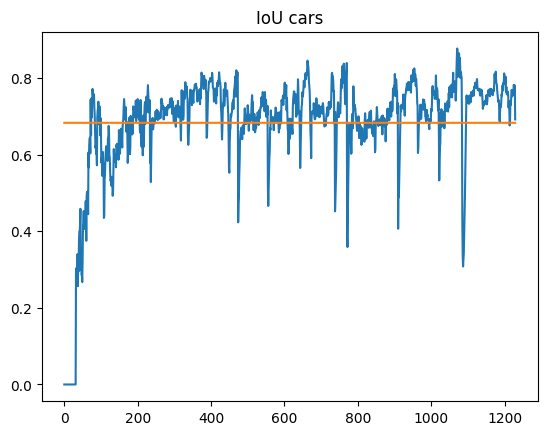

In [24]:
plt.plot(iou_list_cars)
plt.plot(np.ones(len(iou_list_cars))*np.mean(iou_list_cars))
plt.title("IoU cars")
plt.show()

Mauvaise segmentation


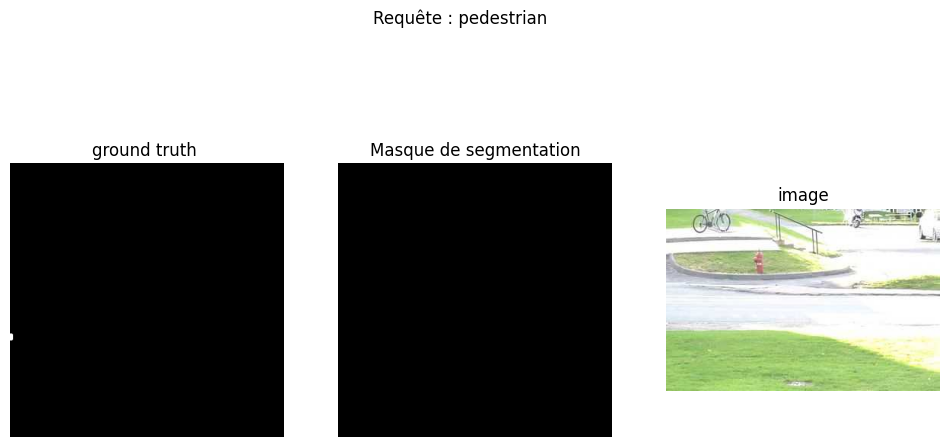

Mauvaise segmentation


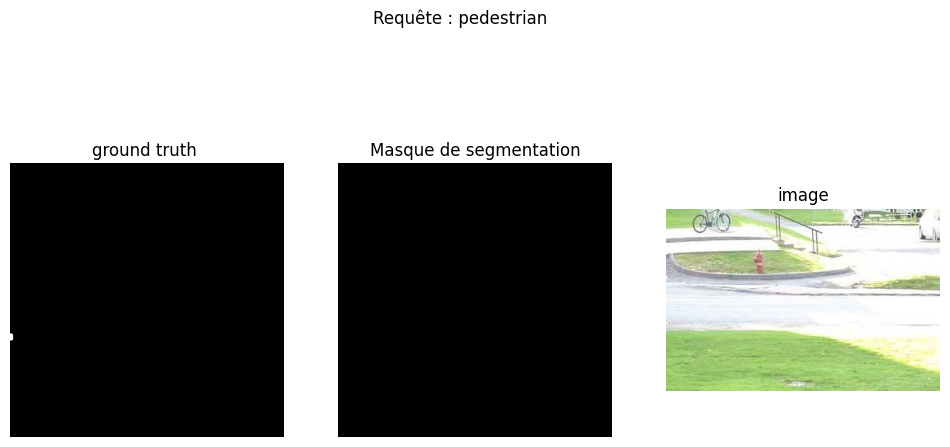

Mauvaise segmentation


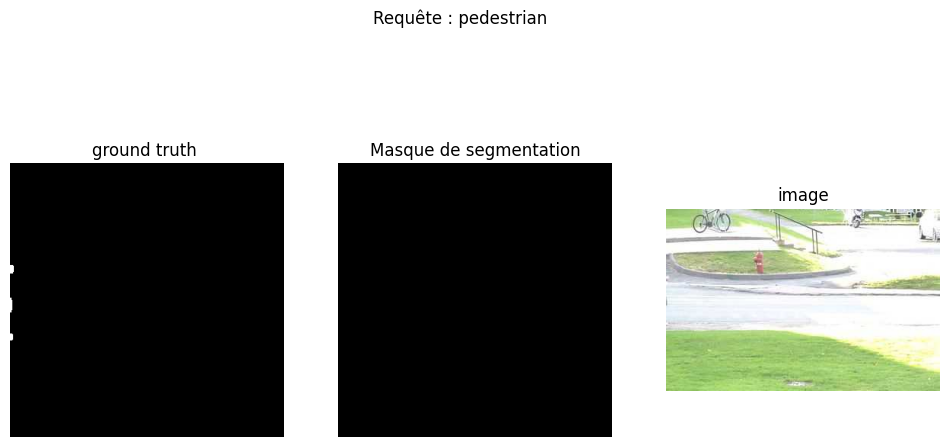

Mauvaise segmentation


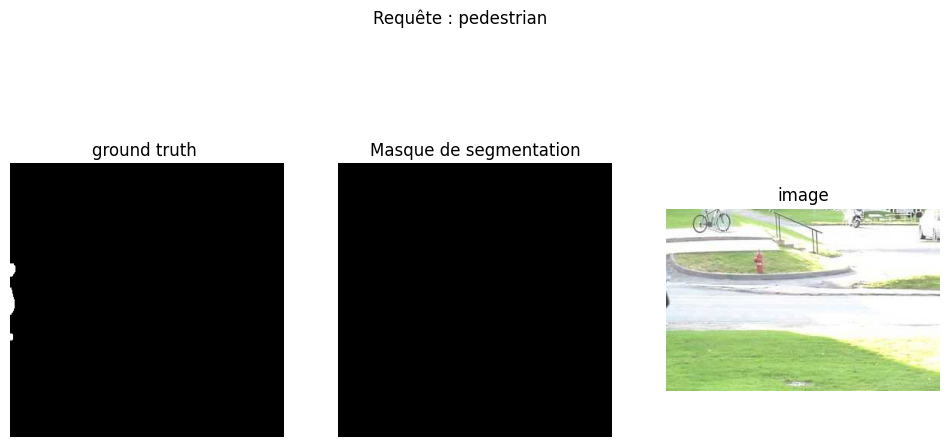

Mauvaise segmentation


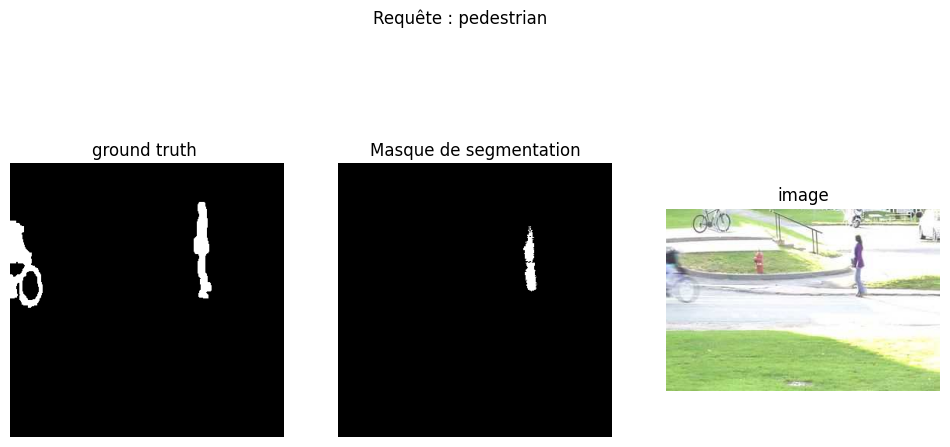

Mauvaise segmentation


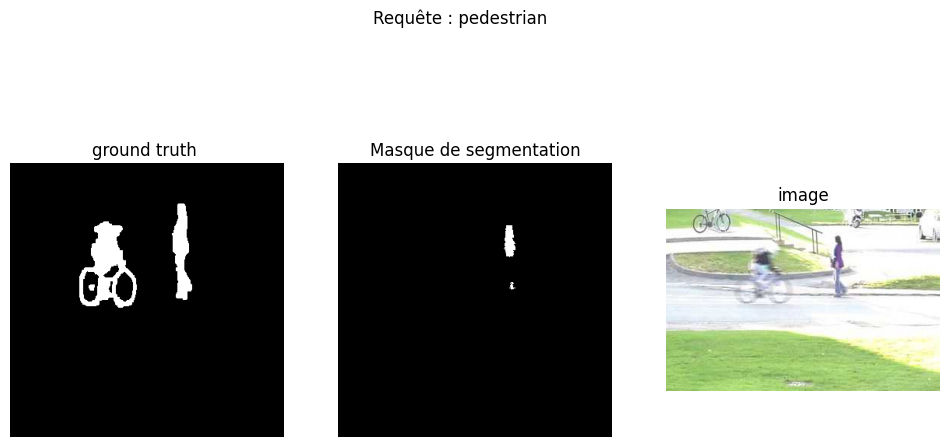

Mauvaise segmentation


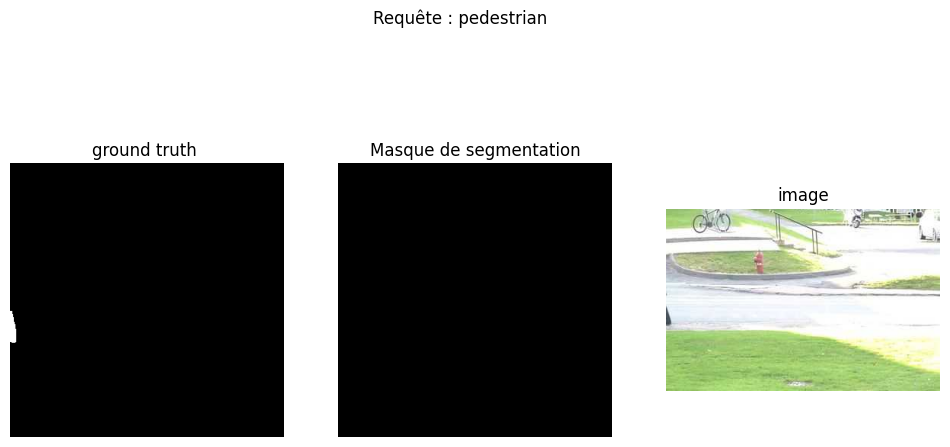

Mauvaise segmentation


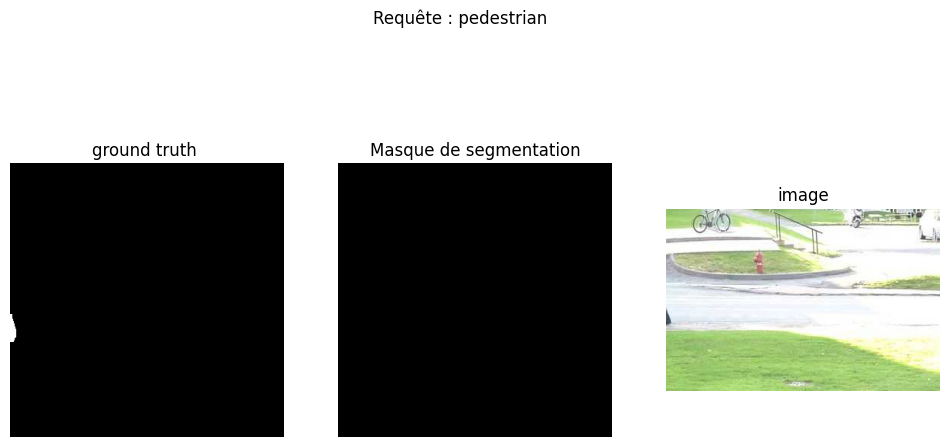

Mauvaise segmentation


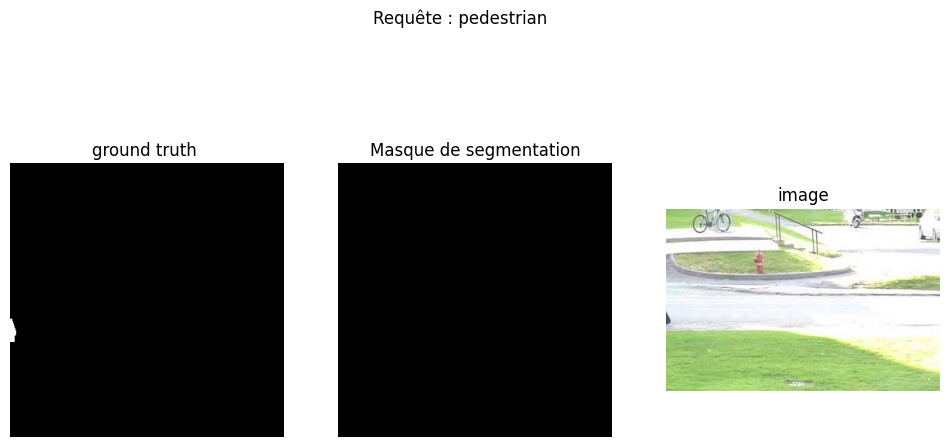

Mauvaise segmentation


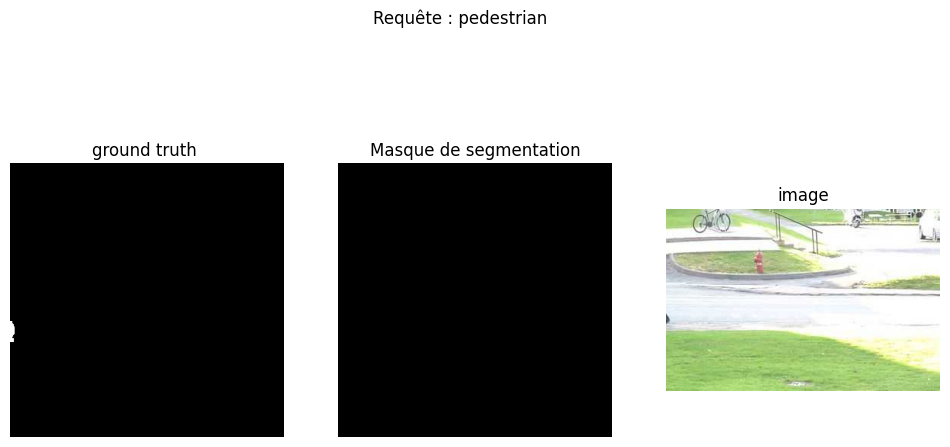

Mauvaise segmentation


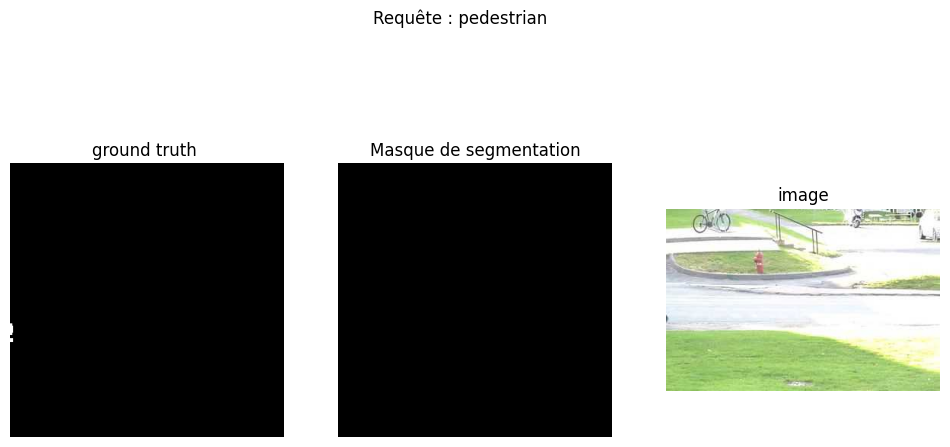

Mauvaise segmentation


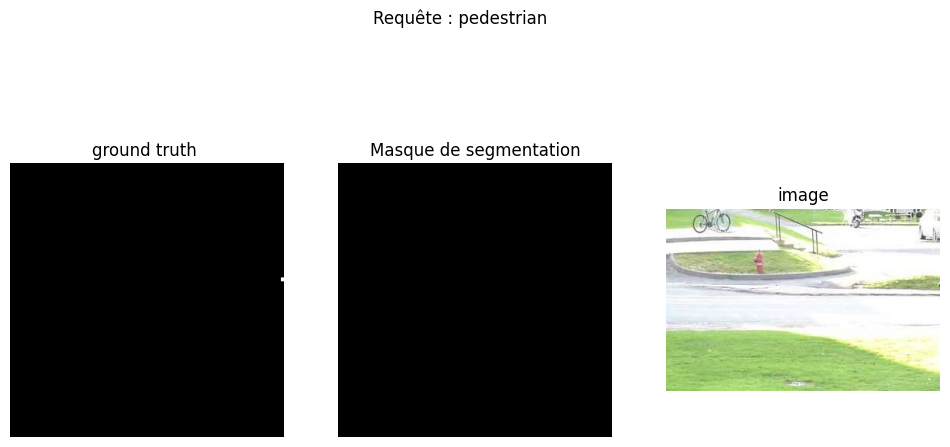

Mauvaise segmentation


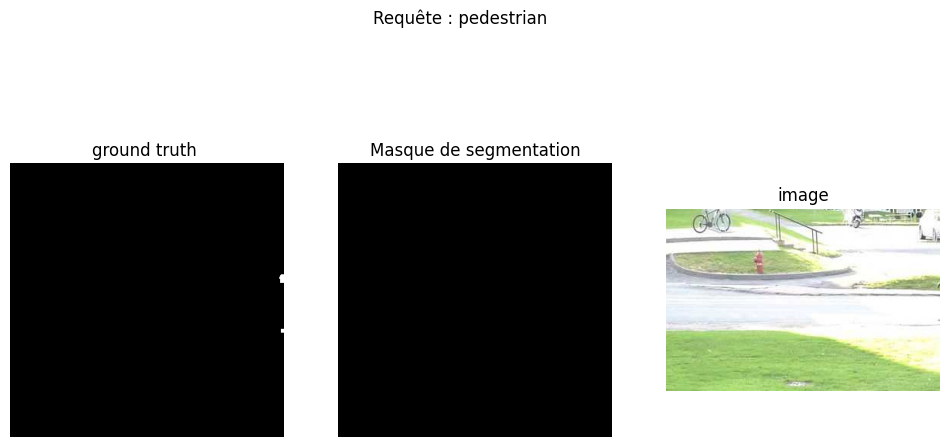

Mauvaise segmentation


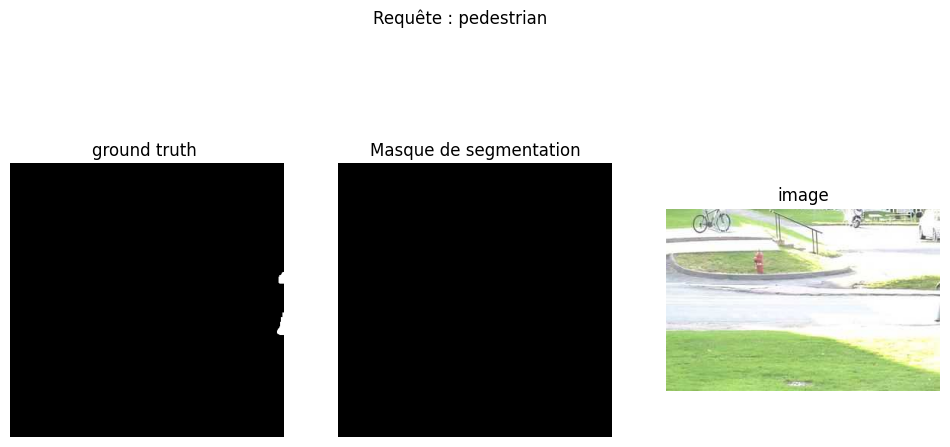

Mauvaise segmentation


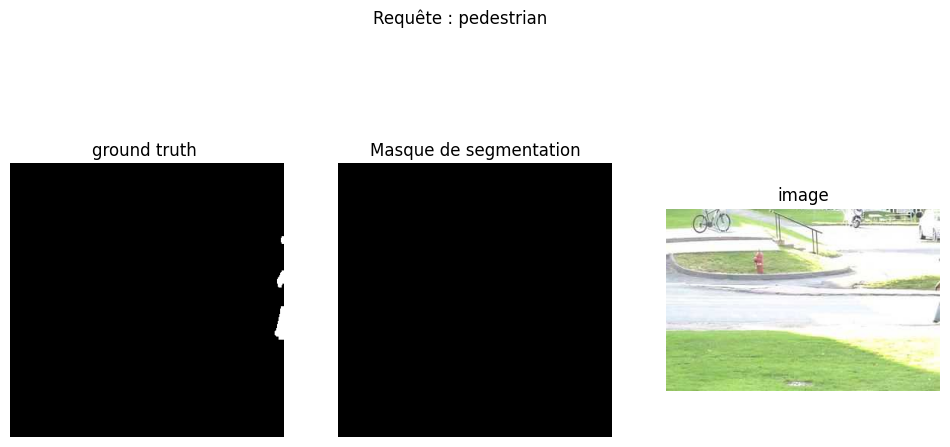

Mauvaise segmentation


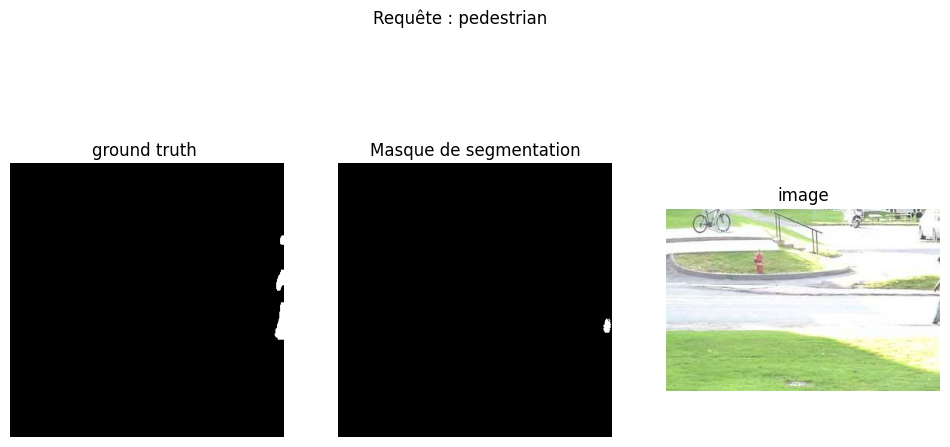

Mauvaise segmentation


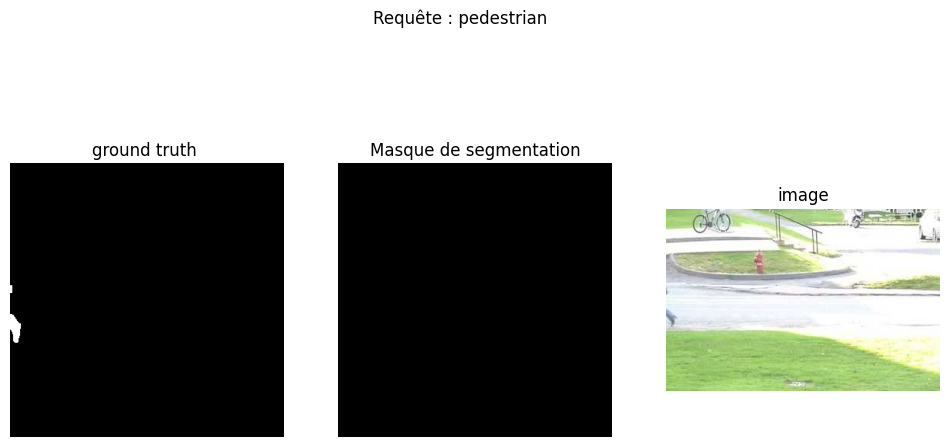

Mauvaise segmentation


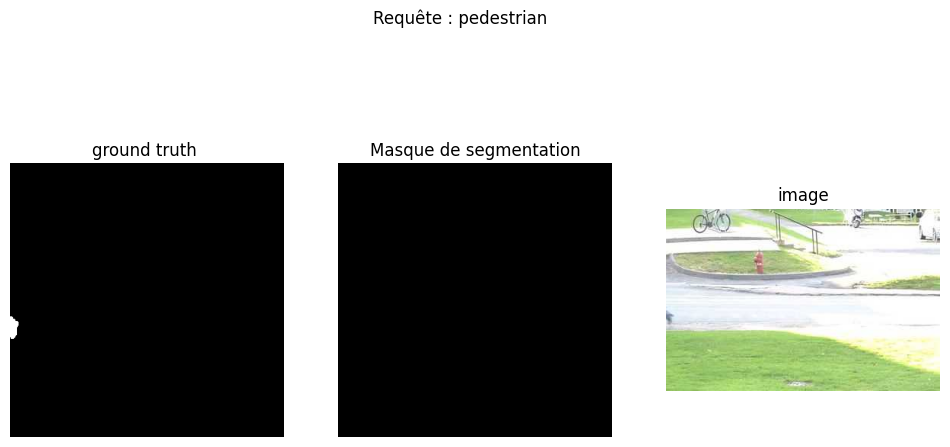

Mauvaise segmentation


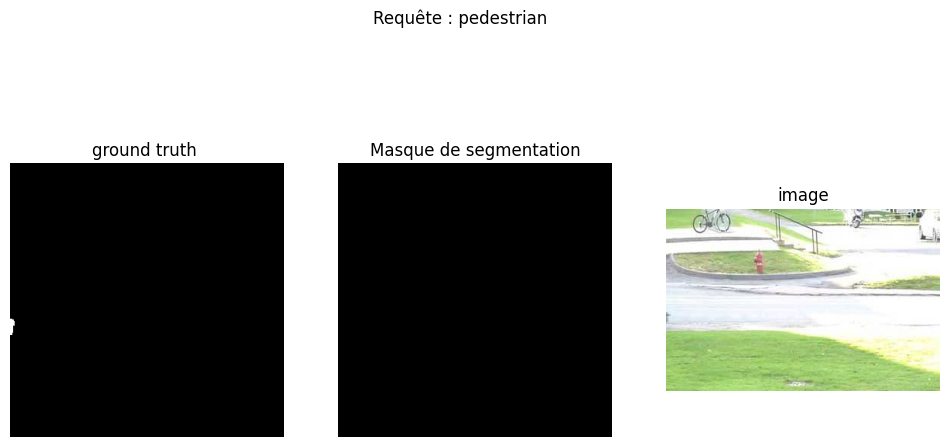

0.7543686108083346


In [25]:

# Définis le dossier contenant les images
image_dir = "baseline/baseline/pedestrians/input"  
ground_truth_dir = "baseline/baseline/pedestrians/groundtruth"  
nombre_fichiers = len([f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))])
nombre_fichiers_groundtruth = len([f for f in os.listdir(ground_truth_dir) if os.path.isfile(os.path.join(ground_truth_dir, f))])
assert nombre_fichiers == nombre_fichiers_groundtruth
# Liste d'exemples avec le chemin des images
examples = []
ground_truth_list = []  
for i in range( 300 , nombre_fichiers) : 
    examples.append({"path" : "in"+str(0)*(5-int(np.log10(i+1)))+str(i+1)+".jpg","prompt" : "pedestrian"})
    
    ground_truth_list.append({"path":"gt"+str(0)*(5-int(np.log10(i+1)))+str(i+1)+".png","prompt" : "pedestrian"})

# Boucle sur chaque exemple
iou_list_pedestrians = get_results(examples,ground_truth_list)
print(np.mean(iou_list))
   

    
    
    




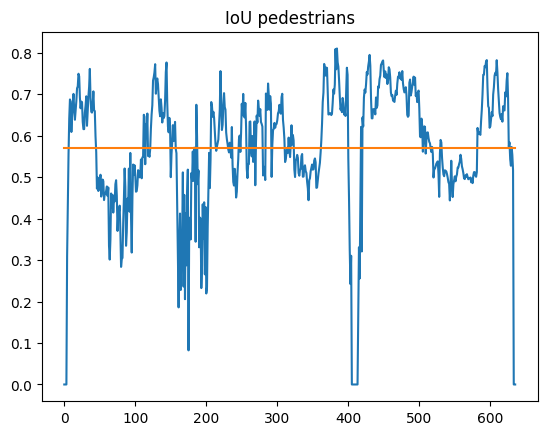

In [26]:
plt.plot(iou_list_pedestrians)
plt.plot(np.ones(len(iou_list_pedestrians))*np.mean(iou_list_pedestrians))
plt.title("IoU pedestrians")
plt.show()

# Animaux camouflés et rares

Mauvaise segmentation


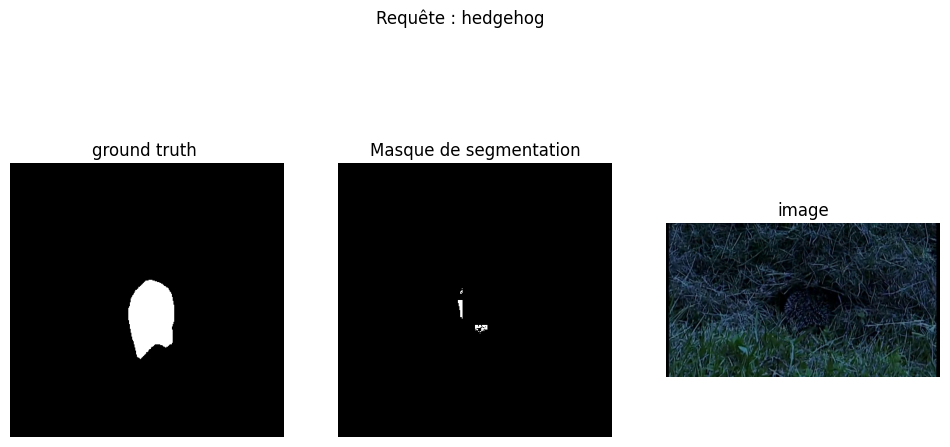

0.6944150455950865


In [27]:

# Définis le dossier contenant les images
image_dir = "hedgehog_0\Imgs"  
ground_truth_dir = "hedgehog_0\GT"  
nombre_fichiers = len([f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))])
nombre_fichiers_groundtruth = len([f for f in os.listdir(ground_truth_dir) if os.path.isfile(os.path.join(ground_truth_dir, f))])
assert nombre_fichiers == nombre_fichiers_groundtruth
# Liste d'exemples avec le chemin des images
examples = []
ground_truth_list = []  
for i in range( nombre_fichiers) : 
    examples.append({"path" : str(0)*(4-int(np.log10(i*5 +1)))+str(i*5)+".jpg","prompt" : "hedgehog"})
    
    ground_truth_list.append({"path":str(0)*(4-int(np.log10(i*5 + 1)))+str(i*5)+".png","prompt" : " hedgehog"})

# Boucle sur chaque exemple

iou_list_hedgehog = get_results(examples,ground_truth_list)
print(np.mean(iou_list_hedgehog))




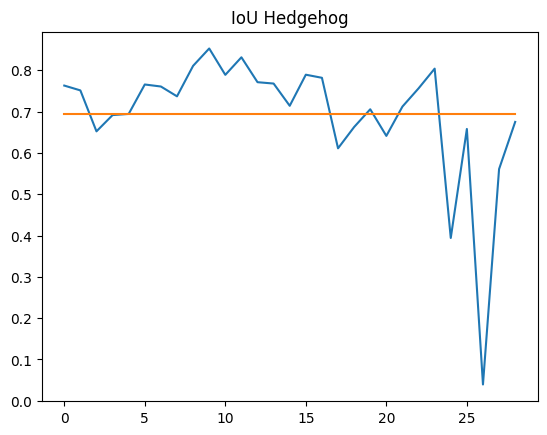

In [28]:
plt.plot(iou_list_hedgehog)
plt.plot(np.ones(len(iou_list_hedgehog))*np.mean(iou_list_hedgehog))
plt.title("IoU Hedgehog")
plt.show()

In [29]:
# Définis le dossier contenant les images
image_dir = "elephant\Imgs"  
ground_truth_dir = "elephant\GT"  
nombre_fichiers = len([f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))])
nombre_fichiers_groundtruth = len([f for f in os.listdir(ground_truth_dir) if os.path.isfile(os.path.join(ground_truth_dir, f))])
assert nombre_fichiers == nombre_fichiers_groundtruth
# Liste d'exemples avec le chemin des images
examples = []
ground_truth_list = []  
for i in range( nombre_fichiers) : 
    examples.append({"path" : str(0)*(4-int(np.log10(i*5 +1)))+str(i*5)+".jpg","prompt" : "elephant"})
    
    ground_truth_list.append({"path":str(0)*(4-int(np.log10(i*5 + 1)))+str(i*5)+".png","prompt" : " elephant"})

iou_list_elephant = get_results(examples,ground_truth_list)
print(np.mean(iou_list_elephant))

0.7543686108083346


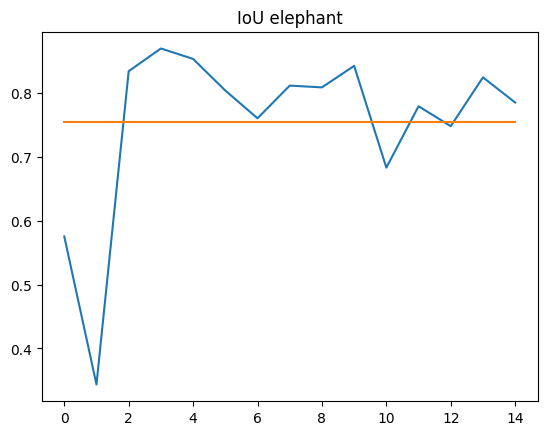

In [30]:
plt.plot(iou_list_elephant)
plt.plot(np.ones(len(iou_list_elephant))*np.mean(iou_list_elephant))
plt.title("IoU elephant")
plt.show()